In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
# imports

import sys
assert sys.version_info >= (3, 5)

# Scikit Learn
import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Check GPU availaility
physical_devices = tf.config.list_logical_devices('GPU')
print("Number of GPU Devices: ", len(physical_devices))

# common imports
import numpy as np
import os

# set random seeds
np.random.seed(42)
tf.random.set_seed(42)

import matplotlib.pyplot as plt
import matplotlib as mpl

print(tf.__version__, keras.__version__)

Number of GPU Devices:  1
2.1.0 2.2.4-tf


## Fashion MNIST

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# whiten 
X_train_full = X_train_full.astype(np.float32) / 255.
X_test = X_test.astype(np.float32)/255.

In [4]:
# split into train and test sets

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [0]:
# helper function to plot images

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

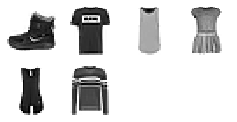

In [6]:
plot_multiple_images(X_train[:6], n_cols=4)

## GANs

![alt text](https://)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

# Generator network
generator = Sequential([
        Dense(100, activation='selu', input_shape=[codings_size]),
        Dense(150, activation='selu'),
        Dense(28 * 28, activation='sigmoid'),
        Reshape([28, 28])
])

# Discriminator network
discriminator = Sequential([
        Flatten(input_shape=[28, 28]),
        Dense(150, activation='selu'),
        Dense(100, activation='selu'),
        Dense(1, activation='sigmoid')
])

gan = Sequential([generator, discriminator])

In [0]:
discriminator.compile(loss='binary_crossentropy', optimizer='RMSProp')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [0]:
batch_size = 32

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [0]:
# training GAN

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            # phase 1 -> training the discriminator
            # generate random noise
            noise = tf.random.normal(shape=[batch_size, codings_size])
            # pass this through the generator
            generated_images = generator(noise)
            # concatenate the real and fake images
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.0]] * batch_size)
            # train discriminator
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 -> training the generator
            # generate noise
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, n_cols=8)
        plt.show()

Epoch 1/1


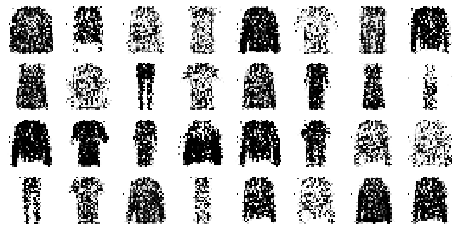

In [24]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

Epoch 1/50


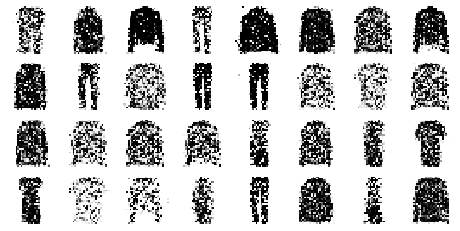

Epoch 2/50


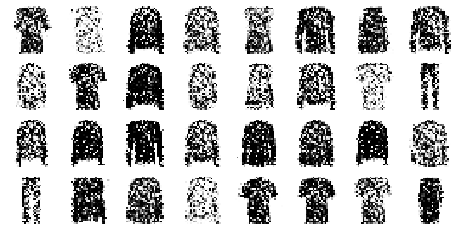

Epoch 3/50


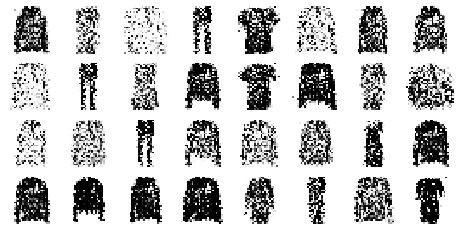

Epoch 4/50


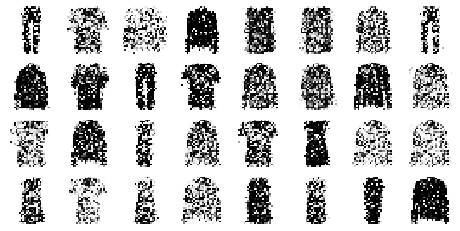

Epoch 5/50


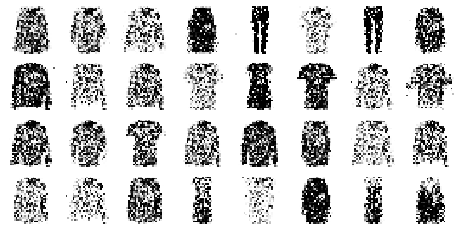

Epoch 6/50


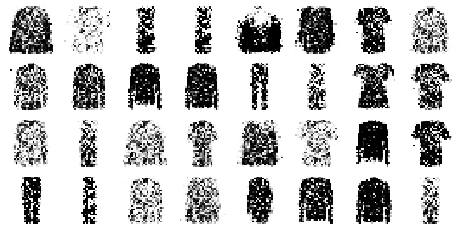

Epoch 7/50


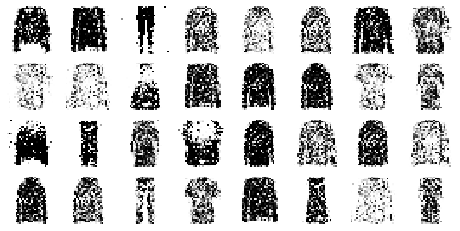

Epoch 8/50


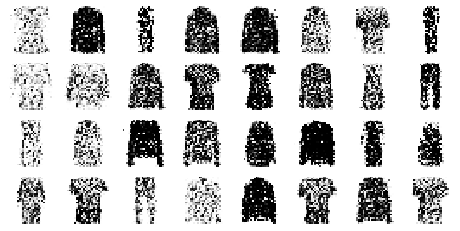

Epoch 9/50


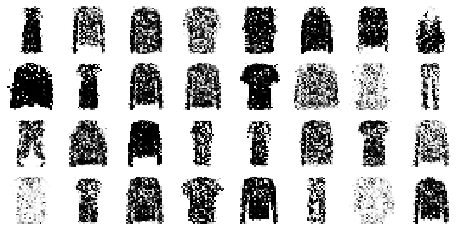

Epoch 10/50


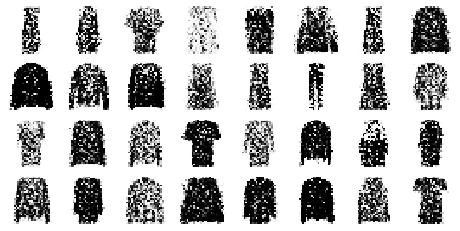

Epoch 11/50


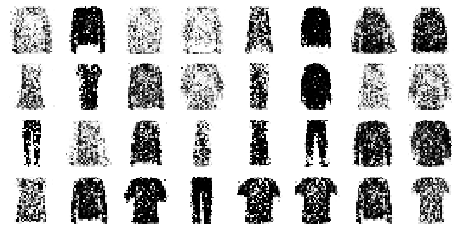

Epoch 12/50


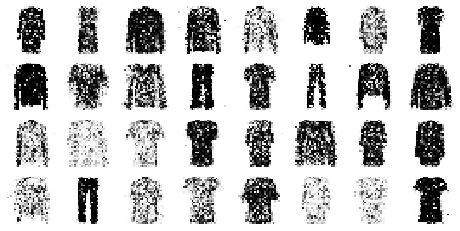

Epoch 13/50


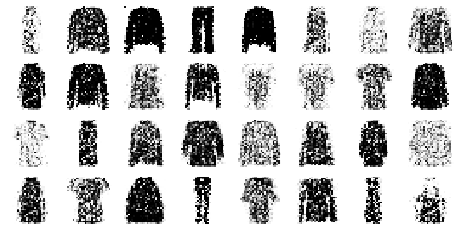

Epoch 14/50


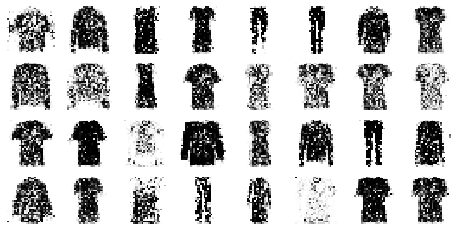

Epoch 15/50


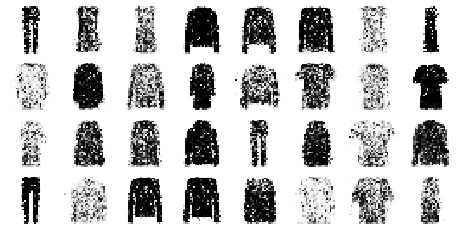

Epoch 16/50


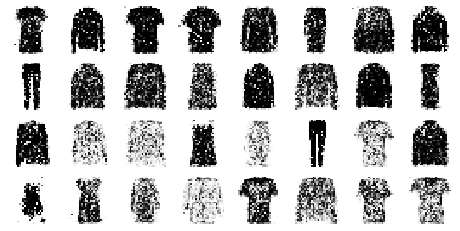

Epoch 17/50


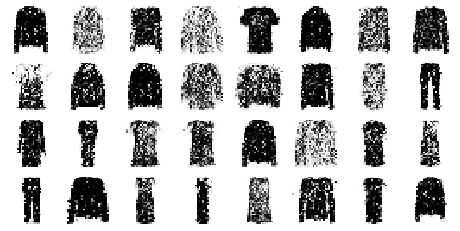

Epoch 18/50


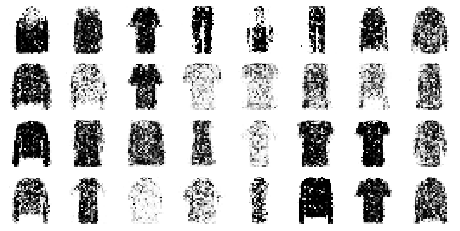

Epoch 19/50


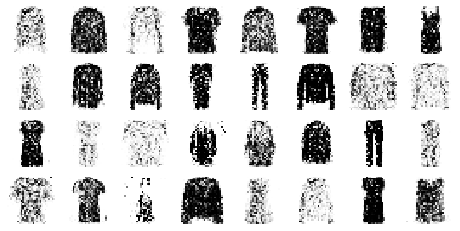

Epoch 20/50


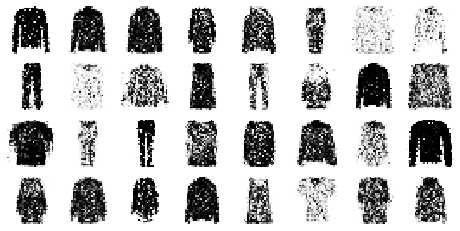

Epoch 21/50


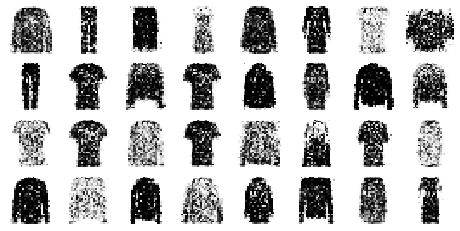

Epoch 22/50


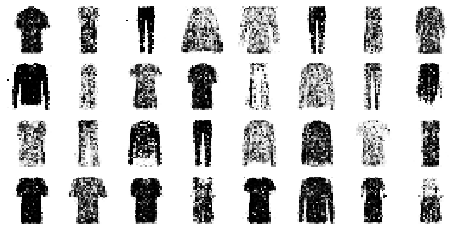

Epoch 23/50


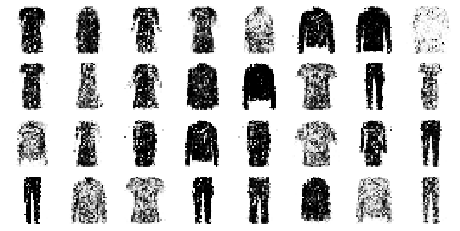

Epoch 24/50


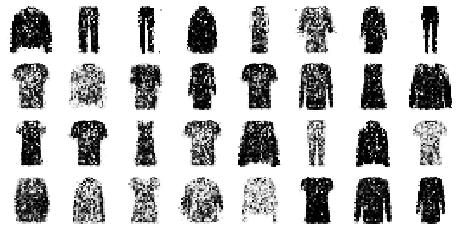

Epoch 25/50


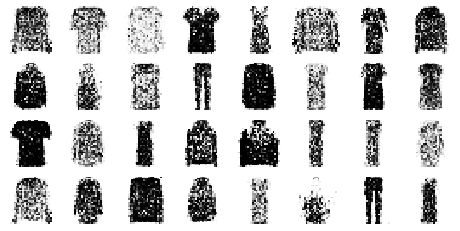

Epoch 26/50


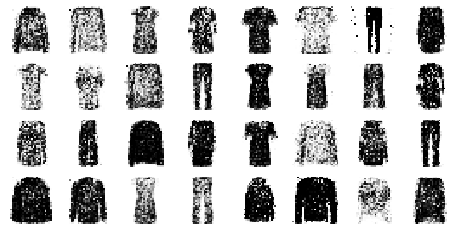

Epoch 27/50


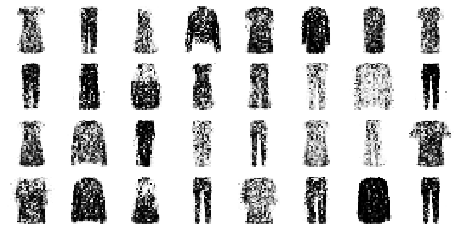

Epoch 28/50


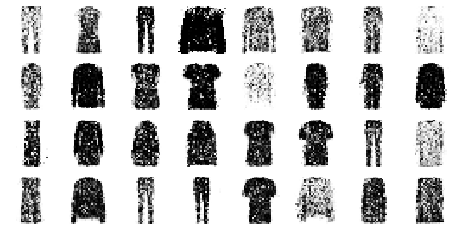

Epoch 29/50


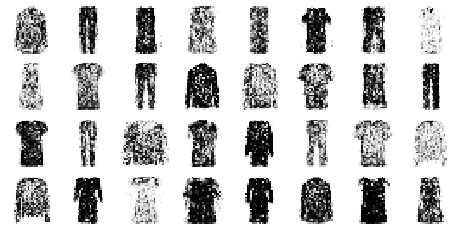

Epoch 30/50


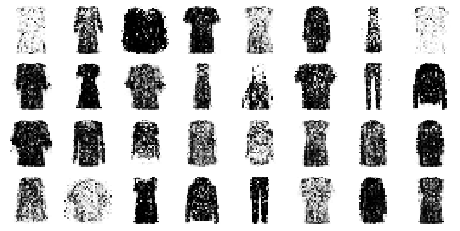

Epoch 31/50


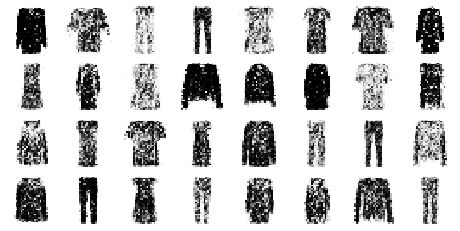

Epoch 32/50


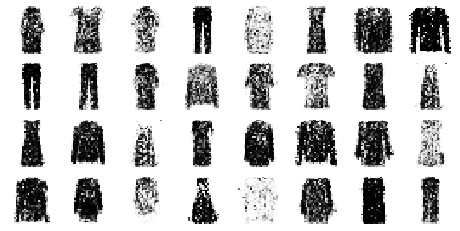

Epoch 33/50


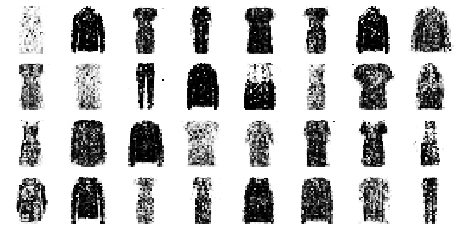

Epoch 34/50


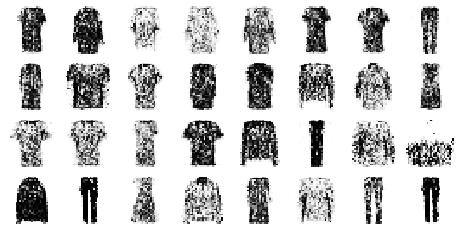

Epoch 35/50


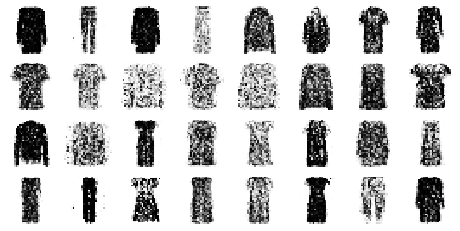

Epoch 36/50


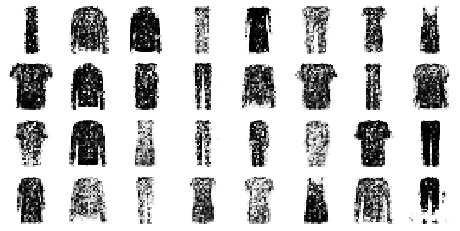

Epoch 37/50


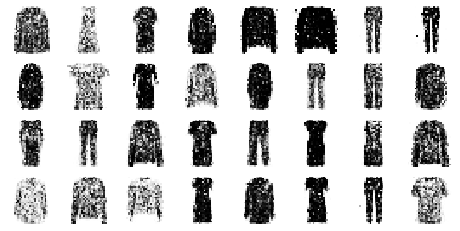

Epoch 38/50


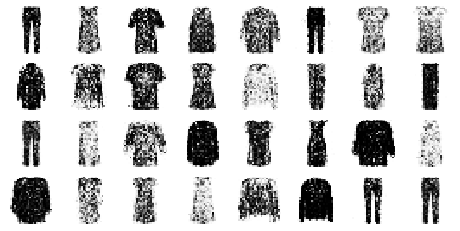

Epoch 39/50


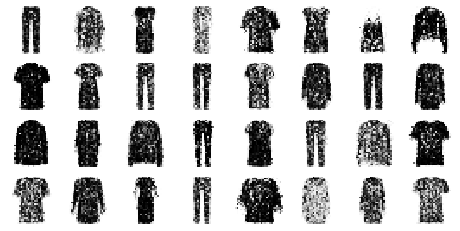

Epoch 40/50


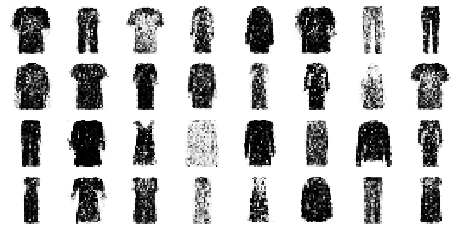

Epoch 41/50


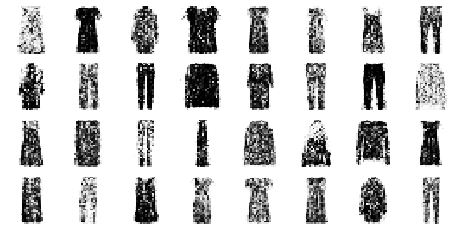

Epoch 42/50


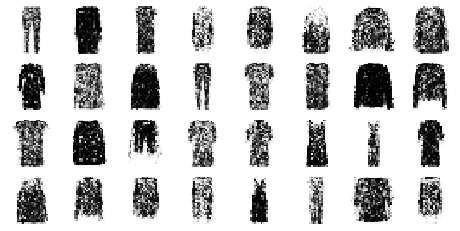

Epoch 43/50


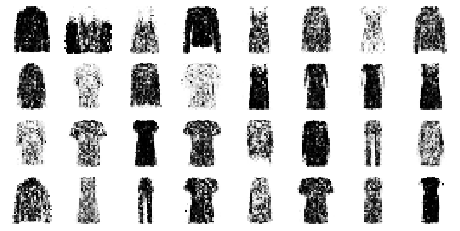

Epoch 44/50


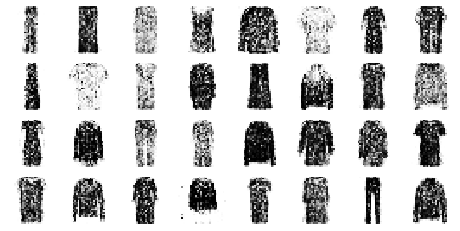

Epoch 45/50


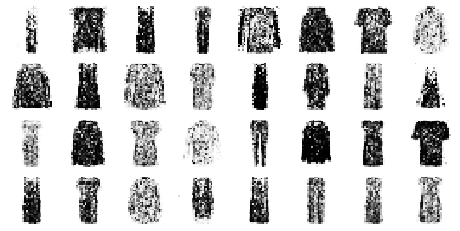

Epoch 46/50


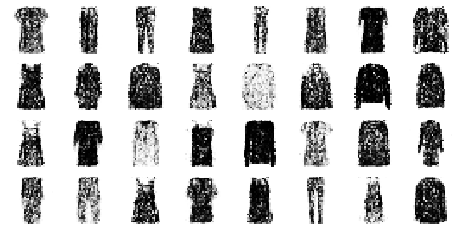

Epoch 47/50


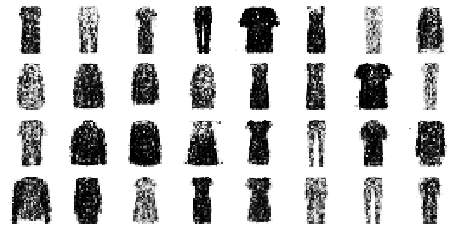

Epoch 48/50


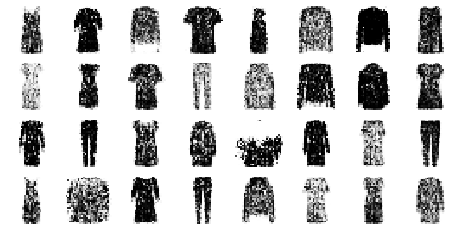

Epoch 49/50


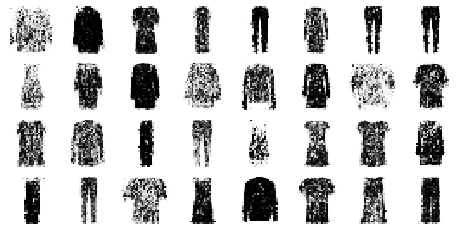

Epoch 50/50


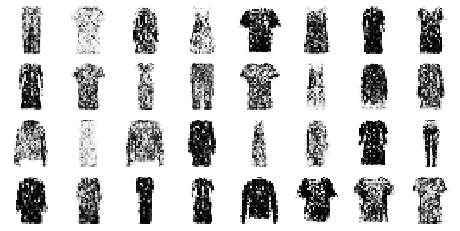

In [26]:
# train for 50 epochs

train_gan(gan, dataset, batch_size, codings_size, n_epochs=50)